In [ ]:
!pip install -q tensorflow==2.1

     |████████████████████████████████| 421.8 MB 25 kB/s 
     |████████████████████████████████| 50 kB 8.2 MB/s 
     |████████████████████████████████| 3.8 MB 52.6 MB/s 
     |████████████████████████████████| 448 kB 72.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.


In [ ]:
import numpy as np
import random

import gym

import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M

import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

2.1.0


## Load GYM environment

In [ ]:
env = gym.make('FrozenLake-v0', is_slippery=False)
s = env.reset()

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


16

## Settings

In [ ]:
LR = 0.1
gamma = 0.99

NUM_EPISODES = 20
MAX_STEPS = 100
REWARD_AVERAGE_WINDOW = 20

## DQN Model

In [ ]:
model = M.Sequential([L.Dense(
    NUM_ACTIONS,
    activation=None,
    use_bias=False,
    kernel_initializer=tf.random_uniform_initializer(0, 0.01))])

def evalQ(s):
     return model(tf.one_hot([s], NUM_STATES)).numpy()[0]

In [ ]:
evalQ(0)

array([0.00040906, 0.00219917, 0.00088716, 0.00406652], dtype=float32)

ValueError: ignored

## Prepare model for training





In [ ]:
def loss(q1, q2):
    return tf.reduce_sum(tf.square(q1 - q2))

optimizer = tf.keras.optimizers.SGD(learning_rate=LR)
model.compile(loss=loss, optimizer=optimizer)

pathLenList = []
totalRewardList = []
totalRewardAverageList = []

## DQN training

In [ ]:
for i in range(NUM_EPISODES):

    eps = 1./((i/50) + 10)

    s = env.reset()

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1
        print("s", s)
        Q_s = evalQ(s)
        print("Q_s = evalQ(s)   ", Q_s)

        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q_s)

        print("a ", a)

        s1, r, done, _ = env.step(a)
        print("s1 ", s1)
        Q_s1 = evalQ(s1)

        Q_target = Q_s

        print("Q_target ", Q_target)
        if done:
            Q_target[a] = r
        else:
            Q_target[a] = r + gamma * np.max(Q_s1)
        Q_target = tf.constant(Q_target)[None, ...]

        print("Q_target ", Q_target)

        model.train_on_batch(tf.one_hot([s], NUM_STATES), Q_target)

        totalReward += r
        s = s1

        if done:
            break

    pathLenList.append(step)
    totalRewardList.append(totalReward)

    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAverageList.append(totalRewardAverage)
        if i % 100 == 0:
            print('Episode {}: average total reward = {}'.format(i, totalRewardAverage))

s 0
Q_s = evalQ(s)    [0.00040906 0.00219917 0.00088716 0.00406652]
a  3
s1  0
Q_target  [0.00040906 0.00219917 0.00088716 0.00406652]
Q_target  tf.Tensor([[0.00040906 0.00219917 0.00088716 0.00402585]], shape=(1, 4), dtype=float32)
s 0
Q_s = evalQ(s)    [0.00040906 0.00219917 0.00088716 0.00405839]
a  3
s1  0
Q_target  [0.00040906 0.00219917 0.00088716 0.00405839]
Q_target  tf.Tensor([[0.00040906 0.00219917 0.00088716 0.0040178 ]], shape=(1, 4), dtype=float32)
s 0
Q_s = evalQ(s)    [0.00040906 0.00219917 0.00088716 0.00405027]
a  3
s1  0
Q_target  [0.00040906 0.00219917 0.00088716 0.00405027]
Q_target  tf.Tensor([[0.00040906 0.00219917 0.00088716 0.00400977]], shape=(1, 4), dtype=float32)
s 0
Q_s = evalQ(s)    [0.00040906 0.00219917 0.00088716 0.00404217]
a  3
s1  0
Q_target  [0.00040906 0.00219917 0.00088716 0.00404217]
Q_target  tf.Tensor([[0.00040906 0.00219917 0.00088716 0.00400175]], shape=(1, 4), dtype=float32)
s 0
Q_s = evalQ(s)    [0.00040906 0.00219917 0.00088716 0.00403408]


## Plot trajectory length over time

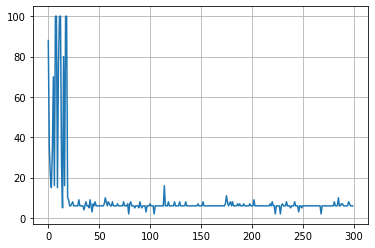

In [ ]:
plt.plot(pathLenList)
plt.grid()

## Plot average total reward over time


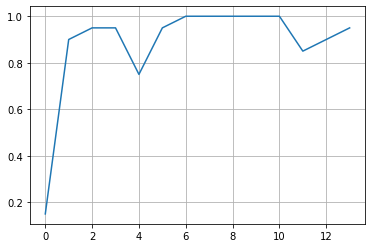

In [ ]:
plt.plot(totalRewardAverageList)
plt.grid()

## Run simulation

In [ ]:
s = env.reset()

for _ in range(1000):
    env.render()
    a = np.argmax(evalQ(s))
    s, r, done, _ = env.step(a)
    if done:
        env.render()
        print('Reward = {}'.format(r))
        break

env.close()


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Reward = 1.0


In [ ]:
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
c

In [ ]:
print(c)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [ ]:
ab = c[None, ...]

In [ ]:
print(ab)

tf.Tensor(
[[[1. 2.]
  [3. 4.]]], shape=(1, 2, 2), dtype=float32)


In [ ]:
bc = c[1, ...]

In [ ]:
print(bc)

tf.Tensor([3. 4.], shape=(2,), dtype=float32)
